# Pseudo Virtual Fields: Neural Networks act as Taylor expansions to find optimal virtual fields via weak equilibrium minimization

In [67]:
import numpy as np
import torch
import pandas as pd

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
from helper_FEBIO import *

In [70]:
import sys
sys.path.insert(0, '../')
from core import *
#config
from config import *
#CUDA
cuda=0
device=initCUDA(cuda)
#supporting files


-----------------------------------------------------
Setting device to:  0
Test:  cuda:0
-----------------------------------------------------



# Read FEBIO data

In [71]:

#Read connectivity
connectivity = pd.read_csv("/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/connectivity")
connectivity

,1,1,9,513,107,44,117,603,368
0,2,9,10,514,513,117,118,604,603
1,3,10,11,515,514,118,119,605,604
2,4,11,12,516,515,119,120,606,605
3,5,12,13,517,516,120,121,607,606
4,6,13,14,518,517,121,122,608,607
...,...,...,...,...,...,...,...,...,...
994,996,1327,1328,354,355,598,599,95,94
995,997,1328,1329,353,354,599,600,96,95
996,998,1329,1330,352,353,600,601,97,96
997,999,1330,1331,351,352,601,602,98,97


### Function to read multiple states from FEBIO file

In [72]:
volume_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/volume"
volume=read_multi_ste_output2(volume_file,p=True) 

Detected 1-field blocks → ['element']
Number of states: 11
 State 1: element=1000
 State 2: element=1000
 State 3: element=1000
 State 4: element=1000
 State 5: element=1000
 State 6: element=1000
 State 7: element=1000
 State 8: element=1000
 State 9: element=1000
 State 10: element=1000
 State 11: element=1000


In [73]:
area_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/area"
area=read_multi_ste_output2(area_file,p=True) 

Detected 1-field blocks → ['element']
Number of states: 11
 State 1: element=600
 State 2: element=600
 State 3: element=600
 State 4: element=600
 State 5: element=600
 State 6: element=600
 State 7: element=600
 State 8: element=600
 State 9: element=600
 State 10: element=600
 State 11: element=600


In [74]:
stress_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/stress"
stress=read_multi_ste_output2(stress_file,p=True)

Detected 6-field blocks → ['xx', 'yy', 'zz', 'xy', 'xz', 'yz']
Number of states: 11
 State 1: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 2: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 3: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 4: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 5: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 6: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 7: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 8: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 9: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 10: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 11: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000


In [75]:
F_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/F"
F=read_multi_ste_output2(F_file,p=True)

Detected 9-field blocks → ['F11', 'F12', 'F13', 'F21', 'F22', 'F23', 'F31', 'F32', 'F33']
Number of states: 11
 State 1: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 2: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 3: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 4: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 5: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 6: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 7: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 8: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 9: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=100

In [76]:
surface_normal_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/surface_normal"
surface_normal=read_multi_ste_output2(surface_normal_file,p=True)

Detected 3-field blocks → ['x', 'y', 'z']
Number of states: 11
 State 1: x=600, y=600, z=600
 State 2: x=600, y=600, z=600
 State 3: x=600, y=600, z=600
 State 4: x=600, y=600, z=600
 State 5: x=600, y=600, z=600
 State 6: x=600, y=600, z=600
 State 7: x=600, y=600, z=600
 State 8: x=600, y=600, z=600
 State 9: x=600, y=600, z=600
 State 10: x=600, y=600, z=600
 State 11: x=600, y=600, z=600


In [77]:
position_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/position"
position=read_multi_ste_output2(position_file,p=True)

Detected 3-field blocks → ['x', 'y', 'z']
Number of states: 11
 State 1: x=1331, y=1331, z=1331
 State 2: x=1331, y=1331, z=1331
 State 3: x=1331, y=1331, z=1331
 State 4: x=1331, y=1331, z=1331
 State 5: x=1331, y=1331, z=1331
 State 6: x=1331, y=1331, z=1331
 State 7: x=1331, y=1331, z=1331
 State 8: x=1331, y=1331, z=1331
 State 9: x=1331, y=1331, z=1331
 State 10: x=1331, y=1331, z=1331
 State 11: x=1331, y=1331, z=1331


### Log file data

In [78]:
#Centroids from log file
centroids_file='/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/Model3.log'
centroids_dict  = parse_states(centroids_file)

#Should get 11 states, each with exactly 1000 x/y/z values:
print("states found:", sorted(centroids_dict.keys()))
for step, d in centroids_dict.items():
    print(f" step {step:2d}: x={len(d['x'])} pts, y={len(d['y'])}, z={len(d['z'])}")

states found: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 step  0: x=1000 pts, y=1000, z=1000
 step  1: x=1000 pts, y=1000, z=1000
 step  2: x=1000 pts, y=1000, z=1000
 step  3: x=1000 pts, y=1000, z=1000
 step  4: x=1000 pts, y=1000, z=1000
 step  5: x=1000 pts, y=1000, z=1000
 step  6: x=1000 pts, y=1000, z=1000
 step  7: x=1000 pts, y=1000, z=1000
 step  8: x=1000 pts, y=1000, z=1000
 step  9: x=1000 pts, y=1000, z=1000
 step 10: x=1000 pts, y=1000, z=1000


### State dict to tensor

In [79]:
# 1) Build a (Nelements,3,nstates) tensor for centroids:
centroids_tensor = states_to_tensor(centroids_dict, ['x','y','z'])
print("centroids_tensor.shape:", centroids_tensor.shape)
# → (Nelements, 3, nstates)

# 2) Build a (Nelements,6,nstates) tensor for volume‐stress:
stress_tensor = states_to_tensor(stress,
                                ['xx','yy','zz','xy','xz','yz'])
print("stress_tensor.shape:", stress_tensor.shape)
# → (Nelements, 6, nstates)

# 3) If you just want the x‐only channel across states:
#x_only = states_to_tensor(centroids_dict, ['x'])
#print("x_only.shape:", x_only.shape)
# → (Nelements, 1, nstates)

# 3) Volume:
volume_tensor = states_to_tensor(volume, ['element'])
print("volume_tensor.shape:", volume_tensor.shape)
# → (Nelements, 1, nstates)

# 4) Deformation tensor:
F_tensor = states_to_tensor(F, ['F11','F12','F13','F21','F22','F23','F31','F32','F33'])
print("F_tensor.shape:", F_tensor.shape)

# 4) Surface Normal:
surface_normal_tensor = states_to_tensor(surface_normal, ['x','y','z'])
print("surface_normal_tensor.shape:", surface_normal_tensor.shape)


# 5) Area:
area_tensor = states_to_tensor(area, ['element'])
print("area_tensor.shape:", area_tensor.shape)

centroids_tensor.shape: torch.Size([1000, 3, 11])
stress_tensor.shape: torch.Size([1000, 6, 11])
volume_tensor.shape: torch.Size([1000, 1, 11])
F_tensor.shape: torch.Size([1000, 9, 11])
surface_normal_tensor.shape: torch.Size([600, 3, 11])
area_tensor.shape: torch.Size([600, 1, 11])


In [14]:
Nelements=F_tensor.shape[0]

## Where pressure is applied

In [80]:
pressure_nodes = parse_quad4_from_feb("/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/Model3.feb", surface_name="Pressure1")
pressure_node_ids = list(pressure_nodes.keys())

In [81]:
pressure_nodes[1], type(pressure_nodes)

([5, 35, 522, 108], dict)

In [82]:
def map_pressure_to_elements(connectivity, pressure_nodes):
    """
    Parameters
    ----------
    connectivity : list of tuples
        Each tuple is (elem_id, node1, node2, node3, ..., nodeK).
    pressure_nodes : set or list of ints
        Node IDs that carry a pressure boundary condition.

    Returns
    -------
    mapping : dict
        { elem_id: {
            'all_nodes':    [n1, n2, …, nK],
            'pressure_nodes': [ni, …]   # only those nodes in this element with pressure
          }
        }
        Only elements with at least one pressure node are included.
    """
    # convert to set for O(1) membership tests
    P = set(pressure_nodes)

    mapping = {}
    for entry in connectivity:
        elem_id, *nodes = entry
        applied = [n for n in nodes if n in P]
        if applied:
            mapping[elem_id] = {
                'all_nodes':     nodes,
                'pressure_nodes': applied
            }
    return mapping

In [83]:
connectivity_list = [
    tuple(map(int, row))           # ensure ints
    for row in connectivity.values
]

# 2) Flatten pressure-node dict into a set of node IDs
pressure_nodes_set = {
    n
    for nodes in pressure_nodes.values()
    for n in nodes
}

mapping_element_pressure = map_pressure_to_elements(connectivity_list, pressure_nodes_set)
#print(mapping.keys())
# (3) inspect
for eid, info in mapping_element_pressure.items():
    print(f"Element {eid}:")
    print("  all_nodes:     ", info['all_nodes'])
    print("  pressure_nodes:", info['pressure_nodes'])

Element 901:
  all_nodes:      [36, 189, 1251, 440, 5, 35, 522, 108]
  pressure_nodes: [5, 35, 522, 108]
Element 902:
  all_nodes:      [189, 190, 1252, 1251, 35, 34, 523, 522]
  pressure_nodes: [35, 34, 523, 522]
Element 903:
  all_nodes:      [190, 191, 1253, 1252, 34, 33, 524, 523]
  pressure_nodes: [34, 33, 524, 523]
Element 904:
  all_nodes:      [191, 192, 1254, 1253, 33, 32, 525, 524]
  pressure_nodes: [33, 32, 525, 524]
Element 905:
  all_nodes:      [192, 193, 1255, 1254, 32, 31, 526, 525]
  pressure_nodes: [32, 31, 526, 525]
Element 906:
  all_nodes:      [193, 194, 1256, 1255, 31, 30, 527, 526]
  pressure_nodes: [31, 30, 527, 526]
Element 907:
  all_nodes:      [194, 195, 1257, 1256, 30, 29, 528, 527]
  pressure_nodes: [30, 29, 528, 527]
Element 908:
  all_nodes:      [195, 196, 1258, 1257, 29, 28, 529, 528]
  pressure_nodes: [29, 28, 529, 528]
Element 909:
  all_nodes:      [196, 197, 1259, 1258, 28, 27, 530, 529]
  pressure_nodes: [28, 27, 530, 529]
Element 910:
  all_node

In [84]:
pressure_element_IDs=list(mapping_element_pressure.keys())

pressure_element_IDs_final = torch.tensor([nid - 1 for nid in pressure_element_IDs], dtype=torch.long)

#len(pressure_element_IDs_final)

In [85]:

#Get normals of surfaces where pressure is applied
# 1) zero‐based indices for those nodes:
idx = torch.tensor([nid - 1 for nid in pressure_node_ids], dtype=torch.long)

# 2) index into the first dimension:
#    result has shape (100, 3, 11)
pressure_normals = surface_normal_tensor[idx, :, :]
area_normals = area_tensor[idx, :, :]

print(pressure_normals.shape)  # → torch.Size([100, 3, 11])

torch.Size([100, 3, 11])


In [86]:
#print("VF.shape =", VF.shape)
print("max idx =", max(pressure_element_IDs_final).item())
print("min idx =", min(pressure_element_IDs_final).item())


max idx = 999
min idx = 900


# Architecture

In [87]:
from model import *

model = ICNN3D_global_Taylor(n_input=6,
                n_hidden=[64,64,64],
                n_output=30,
                use_dropout=True,
                dropout_rate=0.2)

In [88]:
from torchinfo import summary
model = model.to(device)
summary(model)

Layer (type:depth-idx)                   Param #
ICNN3D_global_Taylor                     --
├─ModuleDict: 1-1                        --
│    └─Linear: 2-1                       448
│    └─convexLinear: 2-2                 4,096
│    └─convexLinear: 2-3                 4,096
│    └─convexLinear: 2-4                 1,920
├─ModuleDict: 1-2                        --
│    └─Linear: 2-5                       448
│    └─Linear: 2-6                       448
│    └─convexLinear: 2-7                 180
├─AdaptiveAvgPool1d: 1-3                 --
Total params: 11,636
Trainable params: 11,636
Non-trainable params: 0

## Training loop

In [89]:
F_tensor.shape, stress_tensor.shape, centroids_tensor.shape

(torch.Size([1000, 9, 11]),
 torch.Size([1000, 6, 11]),
 torch.Size([1000, 3, 11]))

In [90]:
x_input= torch.cat(( F_tensor.to(device),centroids_tensor.to(device)), dim=1)
x_input.shape

torch.Size([1000, 12, 11])

In [91]:
def calculate_point(centroids, state):
    delta=centroids[:,:,state]-centroids[:,:,0]
    return delta

In [92]:
def construct_VF(V_NN,delta_xyz):
    Vf = (
        V_NN[0]
        + V_NN[1] * delta_xyz[:,0]
        + V_NN[2] * delta_xyz[:,1]
        + V_NN[3] * delta_xyz[:,2]
        + V_NN[4] * delta_xyz[:,0]**2
        + V_NN[5] * delta_xyz[:,1]**2
        + V_NN[6] * delta_xyz[:,2]**2
        + V_NN[7] * (delta_xyz[:,0] * delta_xyz[:,1])
        + V_NN[8] * (delta_xyz[:,0] * delta_xyz[:,2])
        + V_NN[9] * (delta_xyz[:,1] * delta_xyz[:,2])
    )
    return Vf

In [93]:
def construct_VF_gradients(V_NN: torch.Tensor, delta_xyz: torch.Tensor) -> torch.Tensor:
    """
    V_NN:  either shape (30,), (30,1), or (1,30)
    delta_xyz: shape (Nelements, 3)
    returns grad_V of shape (Nelements, 3, 3)
    """
    # flatten to (30,)
    coeffs = V_NN.squeeze()
    if coeffs.numel() != 30:
        raise ValueError(f"expected 30 coefficients, got {coeffs.shape}")

    dx = delta_xyz[:, 0]
    dy = delta_xyz[:, 1]
    dz = delta_xyz[:, 2]

    # split into three 10-coefficient chunks
    a = coeffs[ 0:10]  # Vx
    b = coeffs[10:20]  # Vy
    c = coeffs[20:30]  # Vz

    # alias the ones we need
    a1,a2,a3 = a[1],a[2],a[3]
    a4,a5,a6 = a[4],a[5],a[6]
    a7,a8,a9 = a[7],a[8],a[9]

    b1,b2,b3 = b[1],b[2],b[3]
    b4,b5,b6 = b[4],b[5],b[6]
    b7,b8,b9 = b[7],b[8],b[9]

    c1,c2,c3 = c[1],c[2],c[3]
    c4,c5,c6 = c[4],c[5],c[6]
    c7,c8,c9 = c[7],c[8],c[9]

    # compute the nine partials
    dVx_dx = -a1 - 2*a4*dx -    a7*dy -    a8*dz
    dVx_dy = -a2 -    a7*dx - 2*a5*dy -    a9*dz
    dVx_dz = -a3 -    a8*dx -    a9*dy - 2*a6*dz

    dVy_dx = -b1 - 2*b4*dx -    b7*dy -    b8*dz
    dVy_dy = -b2 -    b7*dx - 2*b5*dy -    b9*dz
    dVy_dz = -b3 -    b8*dx -    b9*dy - 2*b6*dz

    dVz_dx = -c1 - 2*c4*dx -    c7*dy -    c8*dz
    dVz_dy = -c2 -    c7*dx - 2*c5*dy -    c9*dz
    dVz_dz = -c3 -    c8*dx -    c9*dy - 2*c6*dz

    # pack into (Nelements, 3, 3)
    row1 = torch.stack((dVx_dx, dVx_dy, dVx_dz), dim=1)
    row2 = torch.stack((dVy_dx, dVy_dy, dVy_dz), dim=1)
    row3 = torch.stack((dVz_dx, dVz_dy, dVz_dz), dim=1)
    
    return torch.stack((row1, row2, row3), dim=1)

In [94]:
N = stress_tensor.shape[0]
stress_tensor_3d = torch.zeros(N, 3, 3,11,
                device=stress_tensor.device,
                dtype=stress_tensor.dtype)

# diagonals
stress_tensor_3d[:,0,0] = stress_tensor[:,0]   # stress_tensor_3d_xx
stress_tensor_3d[:,1,1] = stress_tensor[:,1]   # stress_tensor_3d_yy
stress_tensor_3d[:,2,2] = stress_tensor[:,2]   # stress_tensor_3d_zz

# off‐diagonals (symmetric)
stress_tensor_3d[:,0,1] = stress_tensor[:,3]   # stress_tensor_3d_xy
stress_tensor_3d[:,1,0] = stress_tensor[:,3]

stress_tensor_3d[:,0,2] = stress_tensor[:,4]   # stress_tensor_3d_xz
stress_tensor_3d[:,2,0] = stress_tensor[:,4]

stress_tensor_3d[:,1,2] = stress_tensor[:,5]   # stress_tensor_3d_yz
stress_tensor_3d[:,2,1] = stress_tensor[:,5]

In [95]:
stress_tensor_3d.shape

torch.Size([1000, 3, 3, 11])

In [133]:
def init_weights(m):
	if isinstance(m, torch.nn.Linear):
		torch.nn.init.xavier_uniform_(m.weight)

In [136]:
model.apply(init_weights)

ICNN3D_global_Taylor(
  (layers): ModuleDict(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): convexLinear()
    (2): convexLinear()
    (3): convexLinear()
  )
  (skip_layers): ModuleDict(
    (1): Linear(in_features=6, out_features=64, bias=True)
    (2): Linear(in_features=6, out_features=64, bias=True)
    (3): convexLinear()
  )
  (global_pooling): AdaptiveAvgPool1d(output_size=1)
)

In [139]:
epoch=500
# Adam with a learning rate:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
#Number of states:
states=x_input.shape[2]
N_pressure_dofs=len(pressure_element_IDs_final)
for i in range(epoch):
    optimizer.zero_grad()#reset gradients
    loss = torch.tensor([0.])
    #Estimate
    for s in range(1,states):
        V_NN=model(x_input[:,:,s]) #This is N elements x12 

        delta_xyz=calculate_point(centroids_tensor, s) #This is N elements x3

        Vx=construct_VF(V_NN[0:10],delta_xyz)
        Vy=construct_VF(V_NN[10:20],delta_xyz)
        Vz=construct_VF(V_NN[20:30],delta_xyz)

        VF=torch.cat((Vx.unsqueeze(1),Vy.unsqueeze(1),Vz.unsqueeze(1)), dim=1)
        grad_VF= construct_VF_gradients(V_NN, delta_xyz)

        #Strain
        virtual_strain=0.5*(grad_VF+grad_VF.transpose(1,2))

        #Volume integral:
        # element‐wise inner product σ^e : ∇v^e
        integrand = torch.sum(stress_tensor_3d[:,:,:,s] * virtual_strain, dim=(1, 2)) # → shape [N]
       # print(f'Integrand shape: {integrand.shape}')
        W_int = torch.sum(integrand * volume_tensor[:,0,s] )/Nelements
       # print(f'W_int shape: {W_int.shape}')
        #Surface integral
        t_surface=pressure_normals[:,:,s]*10000 #normal times scalar amount tells quantity
     #   print(f'W_int shape: {W_int.shape}')
        dot = (t_surface * VF[pressure_element_IDs_final,:]).sum(dim=1, keepdim=True)  # shape: [100, 1]

        W_ext=torch.sum(dot*area_normals[:,:,s])/N_pressure_dofs

        #Loss:
        loss+=(W_int-W_ext)**2

    loss/=states

    if i % 50 == 0:
        W_int_item = W_int.item()
        W_ext_item = W_ext.item()
        L_item    = loss.item()
        print(
            f"Epoch {i:4d} │ "
            f"W_int (internal work): {W_int_item: .2e} │ "
            f"W_ext (external work): {W_ext_item: .2e} │ "
            f"Loss: {L_item: .2e}"
        )

    loss.backward()

    optimizer.step()

Epoch    0 │ W_int (internal work):  1.80e+00 │ W_ext (external work): -1.39e+01 │ Loss:  2.04e+02
Epoch   50 │ W_int (internal work):  1.68e+00 │ W_ext (external work): -1.22e+01 │ Loss:  1.58e+02
Epoch  100 │ W_int (internal work):  1.59e+00 │ W_ext (external work): -1.08e+01 │ Loss:  1.26e+02
Epoch  150 │ W_int (internal work):  1.52e+00 │ W_ext (external work): -9.68e+00 │ Loss:  1.02e+02
Epoch  200 │ W_int (internal work):  1.46e+00 │ W_ext (external work): -8.69e+00 │ Loss:  8.32e+01
Epoch  250 │ W_int (internal work):  1.41e+00 │ W_ext (external work): -7.84e+00 │ Loss:  6.86e+01
Epoch  300 │ W_int (internal work):  1.38e+00 │ W_ext (external work): -7.09e+00 │ Loss:  5.70e+01
Epoch  350 │ W_int (internal work):  1.34e+00 │ W_ext (external work): -6.43e+00 │ Loss:  4.75e+01
Epoch  400 │ W_int (internal work):  1.32e+00 │ W_ext (external work): -5.84e+00 │ Loss:  3.98e+01
Epoch  450 │ W_int (internal work):  1.29e+00 │ W_ext (external work): -5.29e+00 │ Loss:  3.34e+01


## Visualize

In [129]:
model.eval()
V_NN=model(x_input[:,:,2]) #This is N elements x9 

delta_xyz=calculate_point(centroids_tensor, 2) #This is N elements x3

Vx=construct_VF(V_NN[0:10],delta_xyz)
Vy=construct_VF(V_NN[10:20],delta_xyz)
Vz=construct_VF(V_NN[20:30],delta_xyz)

VF=torch.cat((Vx.unsqueeze(1),Vy.unsqueeze(1),Vz.unsqueeze(1)), dim=1)

(100, 3)


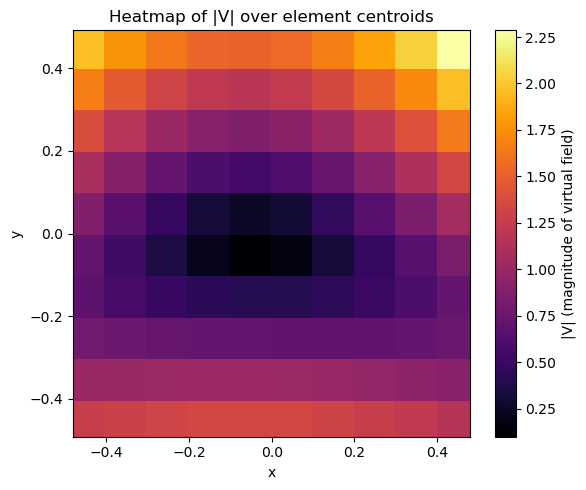

In [131]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ── (Assume these are already in your workspace) ──
# centroids:  (Nelements, 3) torch.Tensor [x_i, y_i, z_i]
# VF:         (Nelements, 3) torch.Tensor [Vx_i, Vy_i, Vz_i]

# 1) Convert to NumPy (if they’re still PyTorch tensors)
centroids_np = centroids_tensor[pressure_element_IDs_final,:,10].detach().cpu().numpy()  # (Nelements, 3)
VF_np        = VF[pressure_element_IDs_final,:].detach().cpu().numpy()         # (Nelements, 3)
print(VF_np.shape)
# 2) Extract x, y, and compute magnitude
x = centroids_np[:, 0]      # (Nelements,)
y = centroids_np[:, 1]      # (Nelements,)

# magnitude of the 3‐D virtual field vector at each centroid:
mag = np.sqrt((VF_np**2).sum(axis=1))  # (Nelements,)

# 3) Make a scatter “heatmap” on the xy‐plane, colored by |V|
plt.figure(figsize=(6,5))
sc = plt.scatter(
    x, 
    y, 
    c=mag, 
    cmap="inferno",     # you can choose "viridis", "plasma", etc.
    s=1000,               # marker size: tweak if too big/small
    marker="s",         # square markers often look more heatmap‐like
    edgecolors="none"
)
plt.colorbar(sc, label="|V| (magnitude of virtual field)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of |V| over element centroids")
plt.axis("equal")       # ensures x- and y-scales match
plt.tight_layout()
plt.show()


In [224]:
def taylor3(x, y, z, coeffs):
    """
    Evaluate a 3-var quadratic Taylor expansion
      f(x,y,z) = c0 
               + cx*x + cy*y + cz*z
               + cxx*x**2 + cyy*y**2 + czz*z**2
               + cxy*x*y + cxz*x*z + cyz*y*z

    Parameters
    ----------
    x, y, z : array-like or scalars (broadcastable to same shape)
    coeffs  : length-10 sequence [c0, cx, cy, cz, cxx, cyy, czz, cxy, cxz, cyz]

    Returns
    -------
    f      : same shape as the broadcast of x,y,z
    """
    c0, cx, cy, cz, cxx, cyy, czz, cxy, cxz, cyz = coeffs.detach().cpu().numpy()
    return (
        c0
      + cx * x + cy * y + cz * z
      + cxx * x**2 + cyy * y**2 + czz * z**2
      + cxy * x * y + cxz * x * z + cyz * y * z
    )


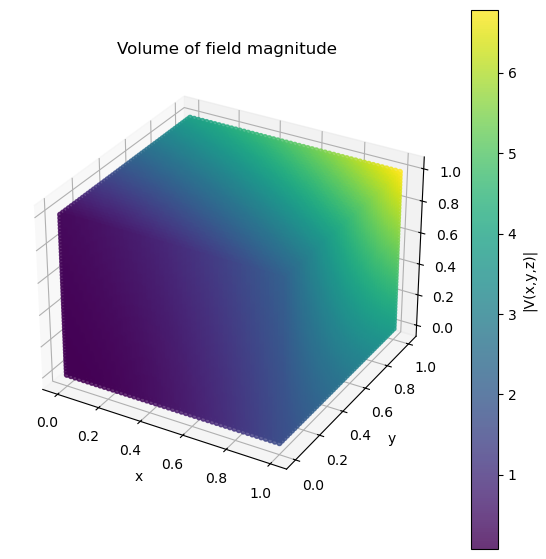

In [225]:
# 1) sample a coarse 3D grid
n = 50  # for speed; increase if you like
xs = ys = zs = np.linspace(0, 1, n)
X, Y, Z = np.meshgrid(xs, ys, zs, indexing='xy')
Vx=taylor3(X, Y, Z, V_NN[:10,0])
Vy=taylor3(X, Y, Z, V_NN[10:20,0])
Vz=taylor3(X, Y, Z, V_NN[20:30,0])

M = np.sqrt(Vx**2 + Vy**2 + Vz**2)

# 3) flatten for scatter
xf = X.ravel()
yf = Y.ravel()
zf = Z.ravel()
Mf = M.ravel()

# 4) plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xf, yf, zf,
               c=Mf,        # color = magnitude
               cmap='viridis',
               marker='o',
               s=12,
               alpha=0.8)
fig.colorbar(p, label='|V(x,y,z)|')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_title('Volume of field magnitude')
plt.show()

In [233]:
import plotly.graph_objects as go
M = np.sqrt(Vx**2 + Vy**2 + Vz**2)

# build a list of Surface traces for each face
surfaces = []

# z = 0 and z = 1
for k, z_idx in enumerate([0, -1]):
    surfaces.append(go.Surface(
        x=X[:,:,z_idx], y=Y[:,:,z_idx], z=Z[:,:,z_idx],
        surfacecolor=M[:,:,z_idx],
        colorscale='Viridis', cmin=M.min(), cmax=M.max(),
        showscale=(k==0)  # show colorbar only once
    ))

# y = 0, y = 1
for y_idx in [0, -1]:
    surfaces.append(go.Surface(
        x=X[:,y_idx,:], y=Y[:,y_idx,:], z=Z[:,y_idx,:],
        surfacecolor=M[:,y_idx,:],
        colorscale='Viridis', showscale=False
    ))

# x = 0, x = 1
for x_idx in [0, -1]:
    surfaces.append(go.Surface(
        x=X[x_idx,:,:], y=Y[x_idx,:,:], z=Z[x_idx,:,:],
        surfacecolor=M[x_idx,:,:],
        colorscale='Viridis', showscale=False
    ))

fig = go.Figure(data=surfaces)
fig.update_layout(
    width=700, height=700,
    scene=dict(
        xaxis=dict(range=[0,1]), yaxis=dict(range=[0,1]), zaxis=dict(range=[0,1]),
        aspectmode='cube'
    ),
    title='Interactive cube-face visualization of |V|'
)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

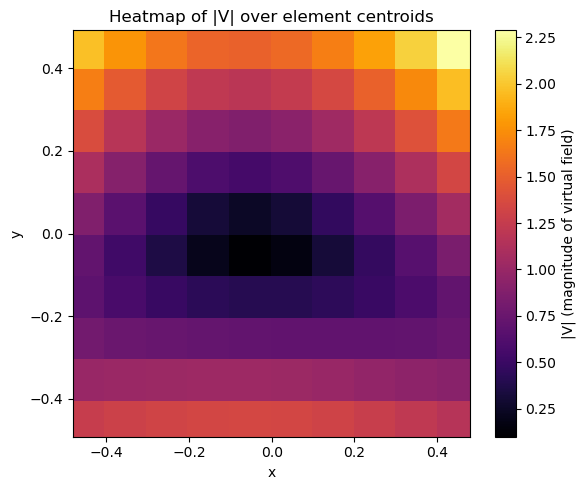

In [127]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ── (Assume these are already in your workspace) ──
# centroids:  (Nelements, 3) torch.Tensor [x_i, y_i, z_i]
# VF:         (Nelements, 3) torch.Tensor [Vx_i, Vy_i, Vz_i]

# 1) Convert to NumPy (if they’re still PyTorch tensors)
centroids_np = centroids_tensor[pressure_element_IDs_final,:,2].detach().cpu().numpy()  # (Nelements, 3)
VF_np        = VF[pressure_element_IDs_final,:].detach().cpu().numpy()         # (Nelements, 3)

# 2) Extract x, y, and compute magnitude
x = centroids_np[:, 0]      # (Nelements,)
y = centroids_np[:, 1]      # (Nelements,)

# magnitude of the 3‐D virtual field vector at each centroid:
mag = np.sqrt((VF_np**2).sum(axis=1))  # (Nelements,)

# 3) Make a scatter “heatmap” on the xy‐plane, colored by |V|
plt.figure(figsize=(6,5))
sc = plt.scatter(
    x, 
    y, 
    c=mag, 
    cmap="inferno",     # you can choose "viridis", "plasma", etc.
    s=1000,               # marker size: tweak if too big/small
    marker="s",         # square markers often look more heatmap‐like
    edgecolors="none"
)
plt.colorbar(sc, label="|V| (magnitude of virtual field)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of |V| over element centroids")
plt.axis("equal")       # ensures x- and y-scales match
plt.tight_layout()
plt.show()


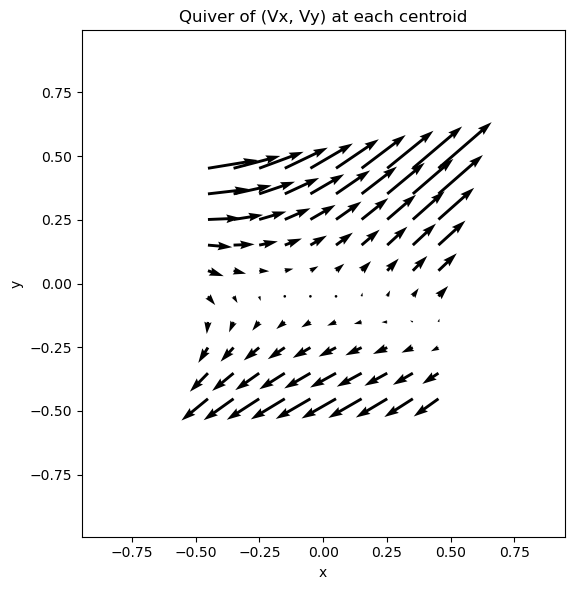

In [227]:
centroids_np = centroids_tensor[pressure_element_IDs_final,:,10].detach().cpu().numpy()  # (Nelements, 3)
VF_np        = VF[pressure_element_IDs_final,:].detach().cpu().numpy()         # (Nelements, 3)
x = centroids_np[:, 0]   # (Nelements,)
y = centroids_np[:, 1]   # (Nelements,)
u = VF_np[:, 0]          # Vx at each centroid
v = VF_np[:, 1]          # Vy at each centroid

plt.figure(figsize=(6,6))
plt.quiver(
    x, y,       # arrow‐base positions
    u, v,       # arrow components
    angles="xy", scale_units="xy")
plt.axis("equal")    # so that 1 unit in x = 1 unit in y
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-1, 1)      # show only from -1 to 1 in x
plt.ylim(-1, 1)      # show only from -1 to 1 in y
plt.title("Quiver of (Vx, Vy) at each centroid")
plt.tight_layout()
plt.show()

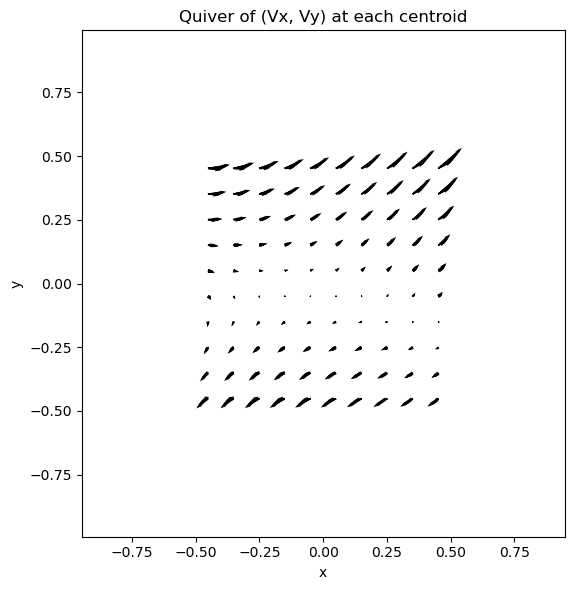

In [204]:
centroids_np = centroids_tensor[:,:,10].detach().cpu().numpy()  # (Nelements, 3)
VF_np        = VF[:,:].detach().cpu().numpy()         # (Nelements, 3)
x = centroids_np[:, 0]   # (Nelements,)
y = centroids_np[:, 1]   # (Nelements,)
u = VF_np[:, 0]          # Vx at each centroid
v = VF_np[:, 1]          # Vy at each centroid

plt.figure(figsize=(6,6))
plt.quiver(
    x, y,       # arrow‐base positions
    u, v,       # arrow components
    angles="xy", scale_units="xy")
plt.axis("equal")    # so that 1 unit in x = 1 unit in y
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-1, 1)      # show only from -1 to 1 in x
plt.ylim(-1, 1)      # show only from -1 to 1 in y
plt.title("Quiver of (Vx, Vy) at each centroid")
plt.tight_layout()
plt.show()

In [144]:
VF_np.shape

(1000, 3)

In [214]:
model.eval()
step=10
V_NN=model(x_input[:,:,step]) #This is N elements x9 

delta_xyz=calculate_point(centroids_tensor, step) #This is N elements x3

Vx=construct_VF(V_NN[0:10],delta_xyz)
Vy=construct_VF(V_NN[10:20],delta_xyz)
Vz=construct_VF(V_NN[20:30],delta_xyz)

VF=torch.cat((Vx.unsqueeze(1),Vy.unsqueeze(1),Vz.unsqueeze(1)), dim=1)

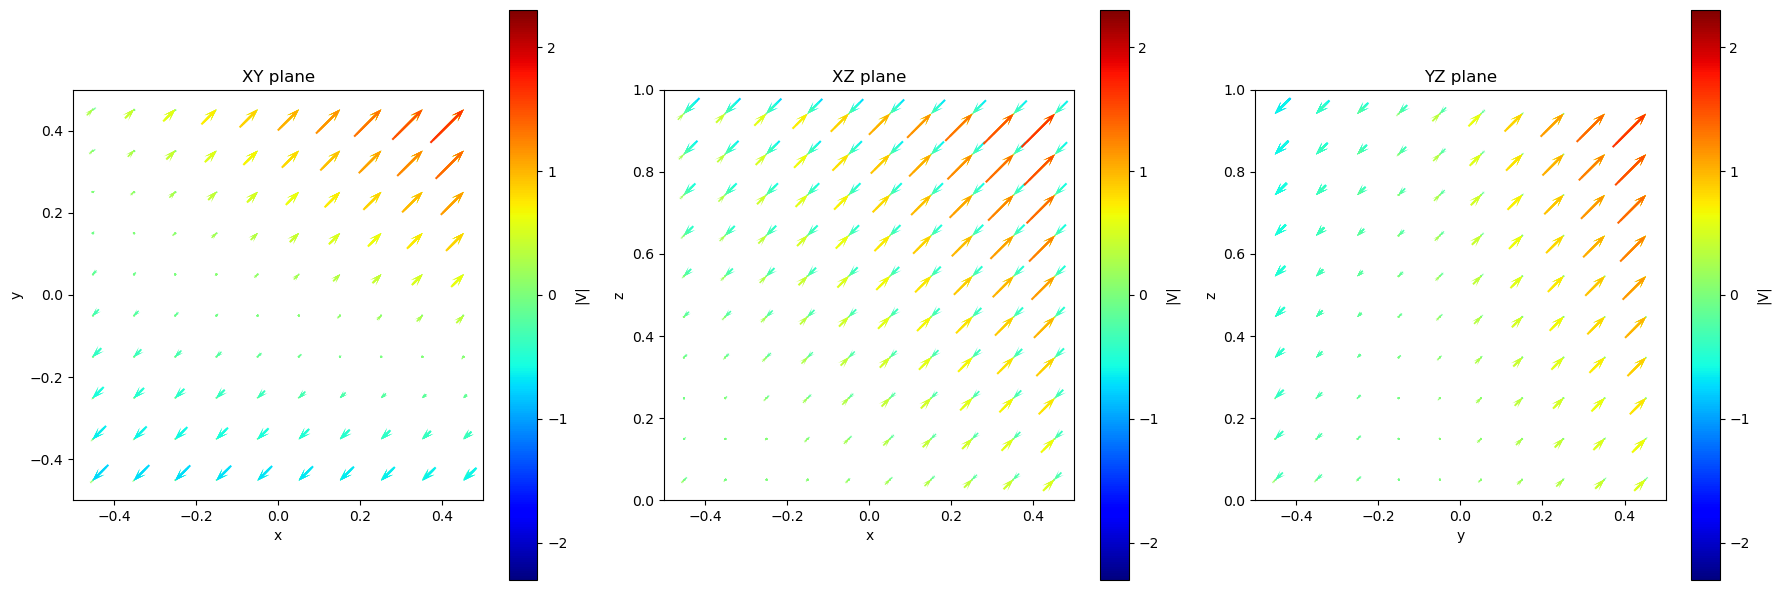

In [215]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

centroids_np = centroids_tensor[:,:,step].detach().cpu().numpy()  # (Nelements, 3)
VF_np        = VF.detach().cpu().numpy()         # (Nelements, 3)


# centroids_np: (N,3), VF_np: (N,3)
x = centroids_np[:, 0]
y = centroids_np[:, 1]
z = centroids_np[:, 2]

u = VF_np[:, 1] #Vx
v = VF_np[:, 1] #Vy
w = VF_np[:, 1] #Vz

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1) XY plane
mag = u
# choose your min/max
vmin, vmax = -2.3, 2.3

norm = Normalize(vmin=vmin, vmax=vmax)


ax = axes[0]
q = ax.quiver(
    x, y, u, v, mag,        # pass mag as the “C” array if you want color
    cmap="jet",          # or "viridis", etc.
    norm=norm,          # ← apply clamping here
    pivot="tip",            # center arrows on the points
    scale=20,               # bigger → arrows shrink; start around 20 and tweak
    width=0.005,            # thin shafts
    headwidth=4,            # wider heads
    headlength=6,           # longer heads
    headaxislength=3,        # gives a nice neck on the head
    angles="xy", scale_units="xy"
)
fig.colorbar(q, ax=ax, label="|V|")
# optional: show the sampling points lightly
ax.set_aspect('equal')
ax.set_xlim(-.5, .5); ax.set_ylim(-.5, .5)
ax.set_xlabel("x"); ax.set_ylabel("y")
ax.set_title("XY plane")

# 2) XZ plane
ax = axes[1]
q = ax.quiver(
    x, z, u, w, mag,        # pass mag as the “C” array if you want color
    cmap="jet",          # or "viridis", etc.
    norm=norm,          # ← apply clamping here
    pivot="tip",            # center arrows on the points
    scale=20,               # bigger → arrows shrink; start around 20 and tweak
    width=0.005,            # thin shafts
    headwidth=4,            # wider heads
    headlength=6,           # longer heads
    headaxislength=3,        # gives a nice neck on the head
    angles="xy", scale_units="xy"
)
fig.colorbar(q, ax=ax, label="|V|")
ax.set_aspect('equal')
ax.set_xlim(-.5, .5); ax.set_ylim(0, 1)
ax.set_xlabel("x"); ax.set_ylabel("z")
ax.set_title("XZ plane")

# 3) YZ plane
ax = axes[2]
q = ax.quiver(
    y, z, v, w, mag,        # pass mag as the “C” array if you want color
    cmap="jet",          # or "viridis", etc.
    norm=norm,          # ← apply clamping here
    pivot="tip",            # center arrows on the points
    scale=20,               # bigger → arrows shrink; start around 20 and tweak
    width=0.005,            # thin shafts
    headwidth=4,            # wider heads
    headlength=6,           # longer heads
    headaxislength=3,        # gives a nice neck on the head
    angles="xy", scale_units="xy"
)
fig.colorbar(q, ax=ax, label="|V|")
ax.set_aspect('equal')
ax.set_xlim(-.5, .5); ax.set_ylim(0, 1)
ax.set_xlabel("y"); ax.set_ylabel("z")
ax.set_title("YZ plane")

plt.tight_layout()
plt.show()


In [239]:
centroids_tensor[1,:,10]

tensor([-0.3503, -0.4505,  0.0498], dtype=torch.float32)

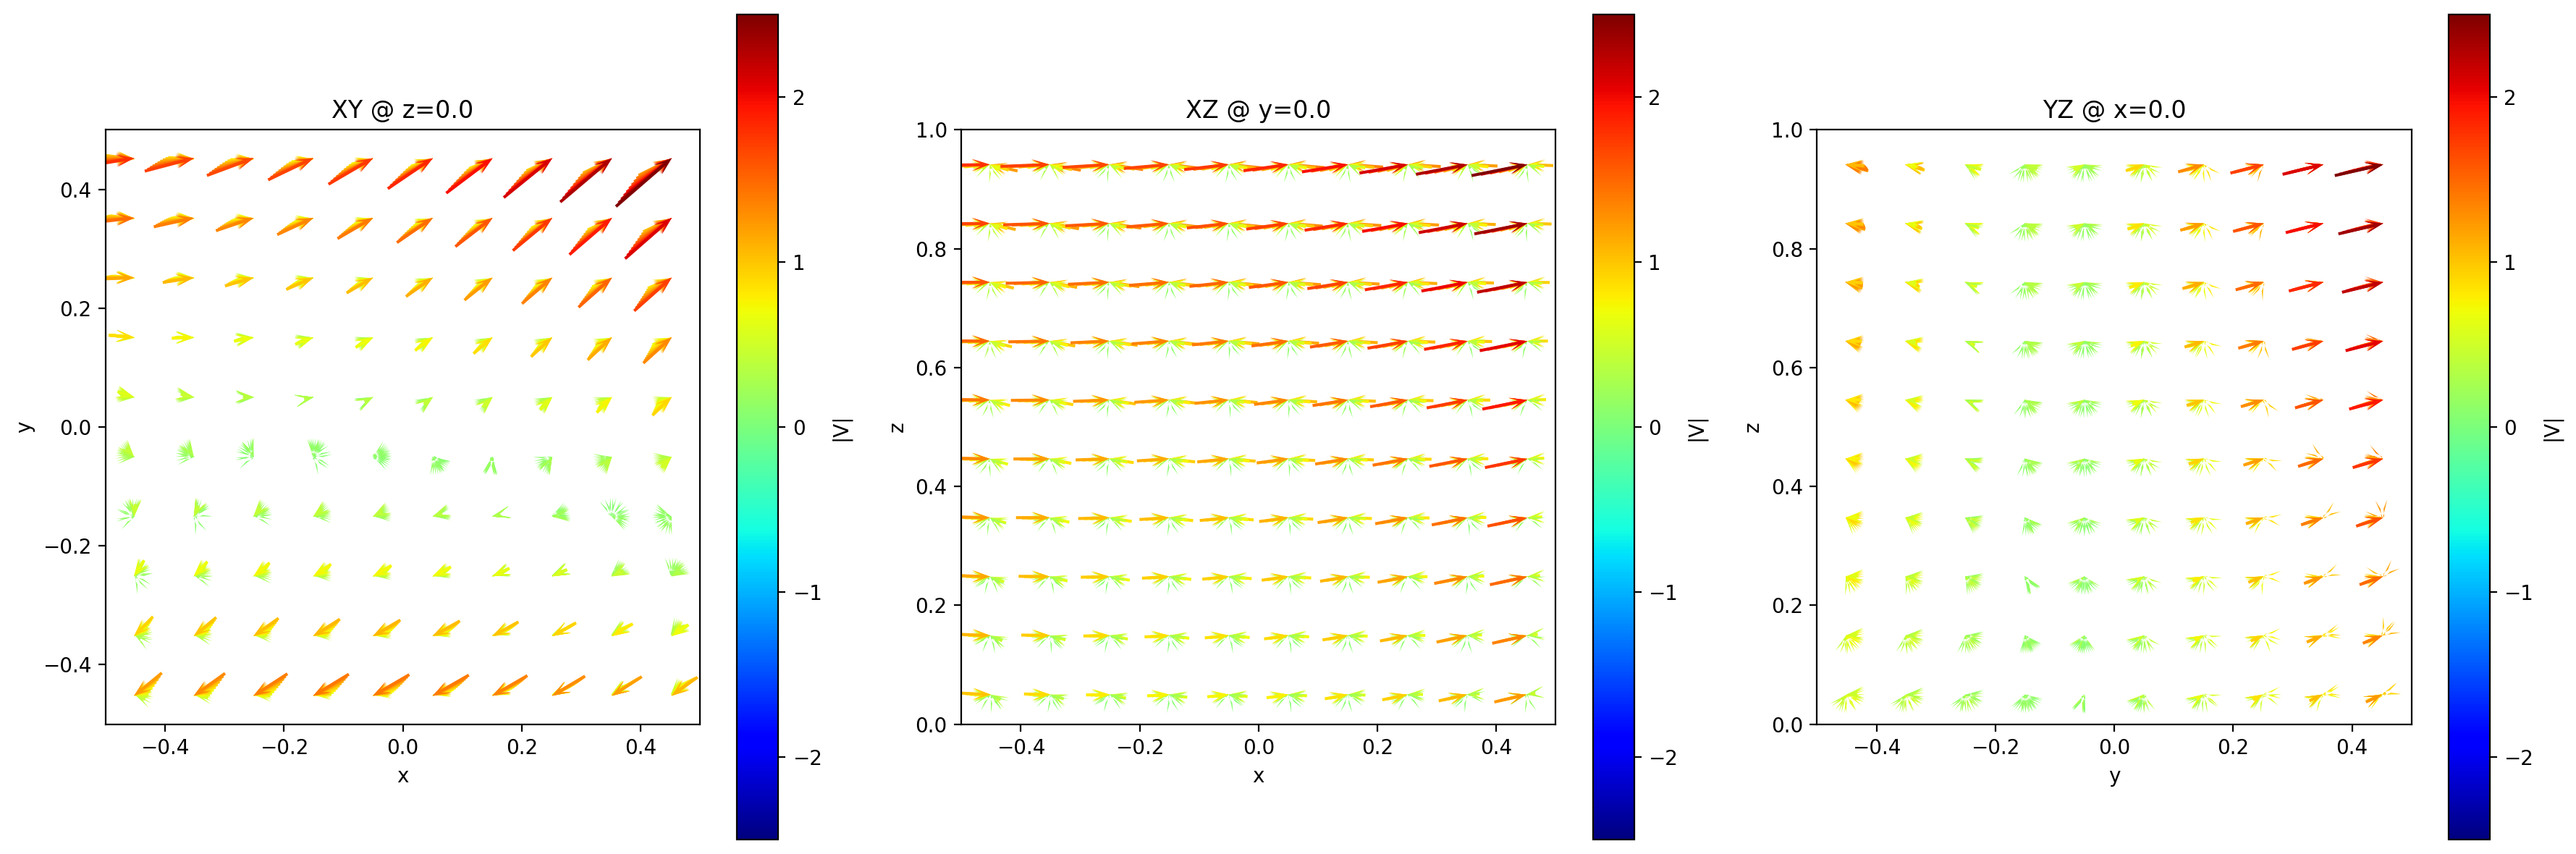

In [247]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# === PARAMETERS ===
time_idx = 10        # which timestep/slice of centroids_tensor to use
slice_z = 0.0       # z‐value for the XY slice
slice_y = 0.0       # y‐value for the XZ slice
slice_x = 0.0       # x‐value for the YZ slice
tol     = 1e-3      # tolerance for “≈” your slice plane
cmap    = 'jet'     # colormap
vmin, vmax = -2.5, 2.5  # clamp for magnitude colorbar

# === EXTRACT NUMPY ARRAYS ===
# centroids_tensor: (Nelements, 3, Ntimes)
# VF:               (Nelements, 3)

centroids_np = centroids_tensor.detach().cpu().numpy()[:, :, time_idx]  # → (N,3)
centroids_mask = centroids_tensor.detach().cpu().numpy()[:, :, 0]  # → (N,3)

VF_np        = VF.detach().cpu().numpy()                                # → (N,3)

x = centroids_np[:, 0]
y = centroids_np[:, 1]
z = centroids_np[:, 2]

u = VF_np[:, 0]
v = VF_np[:, 1]
w = VF_np[:, 2]

mag = np.sqrt(u**2 + v**2 + w**2)
norm = Normalize(vmin=vmin, vmax=vmax)

# === SET UP FIGURE ===
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=200)

# 1) XY @ z ≈ slice_z
mask_z = np.abs(centroids_mask[:,2] - slice_z) < tol
ax = axes[0]
q  = ax.quiver(
    x[mask_z], y[mask_z],
    u[mask_z], v[mask_z],
    mag[mask_z],
    cmap=cmap, norm=norm,
    pivot='tip', scale=20, width=0.005,
    headwidth=4, headlength=6, headaxislength=3,
    minshaft=0, minlength=0,
    angles='xy', scale_units='xy'
)

fig.colorbar(q, ax=ax, label='|V|')
ax.set(aspect='equal',
       xlim=(-0.5, 0.5), ylim=(-0.5, 0.5),
       xlabel='x', ylabel='y',
       title=f'XY @ z={slice_z}')

# 2) XZ @ y ≈ slice_y
mask_y = np.abs(centroids_mask[:,1] - slice_y) < tol
ax = axes[1]
q  = ax.quiver(
    x[mask_y], z[mask_y],
    u[mask_y], w[mask_y],
    mag[mask_y],
    cmap=cmap, norm=norm,
    pivot='tip', scale=20, width=0.005,
    headwidth=4, headlength=6, headaxislength=3,
    minshaft=0, minlength=0,
    angles='xy', scale_units='xy'
)
fig.colorbar(q, ax=ax, label='|V|')
ax.set(aspect='equal',
       xlim=(-0.5, 0.5), ylim=(0.0, 1.0),
       xlabel='x', ylabel='z',
       title=f'XZ @ y={slice_y}')

# 3) YZ @ x ≈ slice_x
mask_x = np.abs(centroids_mask[:,0] - slice_x) < tol
ax = axes[2]
q = ax.quiver(
    y[mask_x], z[mask_x],
    v[mask_x], w[mask_x],
    mag[mask_x],
    cmap=cmap, norm=norm,
    pivot='tip', scale=20, width=0.005,
    headwidth=4, headlength=6, headaxislength=3,
    minshaft=0, minlength=0,
    angles='xy', scale_units='xy'
)
fig.colorbar(q, ax=ax, label='|V|')
ax.set(aspect='equal',
       xlim=(-0.5, 0.5), ylim=(0.0, 1.0),
       xlabel='y', ylabel='z',
       title=f'YZ @ x={slice_x}')

plt.tight_layout()
plt.show()
